In [56]:
import networkx
import math
import random
import matplotlib.pyplot as plt
from collections import Counter
from node2vec import Node2Vec
import warnings
from gensim.models import Word2Vec
from scipy.spatial import distance
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", DeprecationWarning)

## Part 2a Finding significance of node 33

In [57]:
Graph_2 = networkx.Graph()

#Reading the edge list of Graph_2 and adding the edges
fp = open("karate.edgelist.txt", "r")
text = fp.read()
list_lines = text.split("\n")
list_edges = [a.split() for a in list_lines]
for x in list_edges:
    if x[0] == '33' or x[1] == '33':
        Graph_2.add_edge(x[0], x[1], color='r')
    else:
        Graph_2.add_edge(x[0], x[1], color='g')

Degree of node 33 = 12


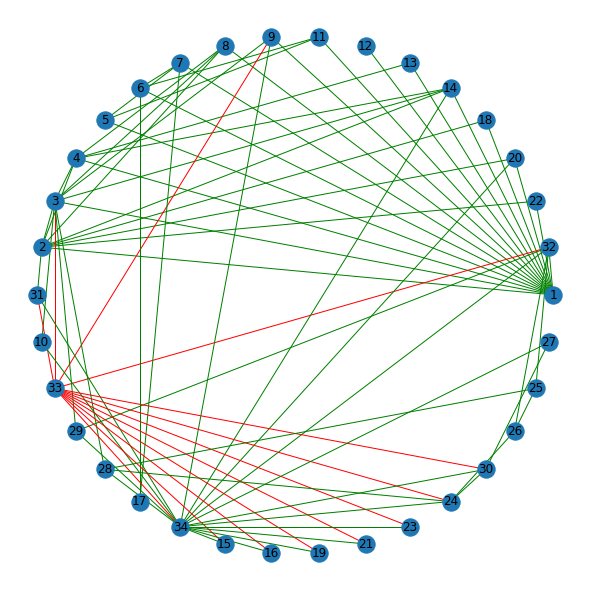

In [58]:
list_colors = [Graph_2[a][b]['color'] for a,b in Graph_2.edges()]
plt.figure(figsize=(8, 8))
networkx.draw_circular(Graph_2, edge_color=list_colors, with_labels=True)
print(f"Degree of node 33 = {Graph_2.degree['33']}")
plt.show()

## Part 2c Finding clusters

In [59]:
# Generate walks
walk_vec_1 = Node2Vec(Graph_2, dimensions=15, walk_length=6, num_walks=100, p = 0.1, q = 1)

# Learn embeddings 
model_1 = walk_vec_1.fit(window=10, min_count=1)


Generating walks (CPU: 1): 100%|████████████████████████████████████████████████████| 100/100 [00:00<00:00, 201.33it/s]


In [60]:
for node, _ in model_1.most_similar('33'):
    print(node)

16
19
34
23
21
15
30
27
24
32


## Part 2d Finding structural similarity

In [61]:
# Generate walks
walk_vec_2 = Node2Vec(Graph_2, dimensions=15, walk_length=3, num_walks=100, p = 1, q = 0.5)

# Learn embeddings 
model_2 = walk_vec_2.fit(window=20, min_count=1)

print(f"Degree of node 34 = {Graph_2.degree['34']}")

for node, _ in model_2.most_similar('34'):
    print(f"node {node}  with degree = {Graph_2.degree[node]}")

Generating walks (CPU: 1): 100%|████████████████████████████████████████████████████| 100/100 [00:00<00:00, 457.85it/s]


Degree of node 34 = 17
node 33  with degree = 12
node 32  with degree = 6
node 2  with degree = 9
node 3  with degree = 10
node 1  with degree = 16
node 28  with degree = 4
node 22  with degree = 2
node 24  with degree = 5
node 26  with degree = 3
node 7  with degree = 4


## Part 2e Neighbourhood similarity

In [62]:
# Generate walks
walk_vec_3 = Node2Vec(Graph_2, dimensions=15, walk_length=3, num_walks=100, p = 100, q = 0.01)

# Learn embeddings 
model_3 = walk_vec_3.fit(window=15, min_count=1)

Generating walks (CPU: 1): 100%|████████████████████████████████████████████████████| 100/100 [00:00<00:00, 470.74it/s]


In [63]:
list_pairs_distance = []
vector_33 = model_3.wv['33']
#Finding eucledian distance of all other nodes from node 33 and then finding the minimum
for b in Graph_2.nodes():
    if b != '33':
        node_vector = model_3[b]
        c = distance.euclidean(node_vector, vector_33)
        list_pairs_distance.append([b, c])

list_pairs_distance.sort(key= lambda x:x[1])

In [64]:
result_node = list_pairs_distance[0][0]
print(f"Degree of node 33 = {Graph_2.degree['33']}")
print(f"Degree of node {result_node} = {Graph_2.degree[result_node]}")

Degree of node 33 = 12
Degree of node 3 = 10
